In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [4]:
import numpy as np

print("Explained variance ratio:")
print(np.round(pca.explained_variance_ratio_, 4))

print("\nCumulative explained variance:")
print(np.round(np.cumsum(pca.explained_variance_ratio_), 4))


Explained variance ratio:
[4.427e-01 1.897e-01 9.390e-02 6.600e-02 5.500e-02 4.020e-02 2.250e-02
 1.590e-02 1.390e-02 1.170e-02 9.800e-03 8.700e-03 8.000e-03 5.200e-03
 3.100e-03 2.700e-03 2.000e-03 1.800e-03 1.600e-03 1.000e-03 1.000e-03
 9.000e-04 8.000e-04 6.000e-04 5.000e-04 3.000e-04 2.000e-04 1.000e-04
 0.000e+00 0.000e+00]

Cumulative explained variance:
[0.4427 0.6324 0.7264 0.7924 0.8473 0.8876 0.9101 0.926  0.9399 0.9516
 0.9614 0.9701 0.9781 0.9834 0.9865 0.9892 0.9911 0.9929 0.9945 0.9956
 0.9966 0.9975 0.9983 0.9989 0.9994 0.9997 0.9999 1.     1.     1.    ]


In [5]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print("Shape after PCA:", X_pca_2.shape)


Shape after PCA: (569, 2)


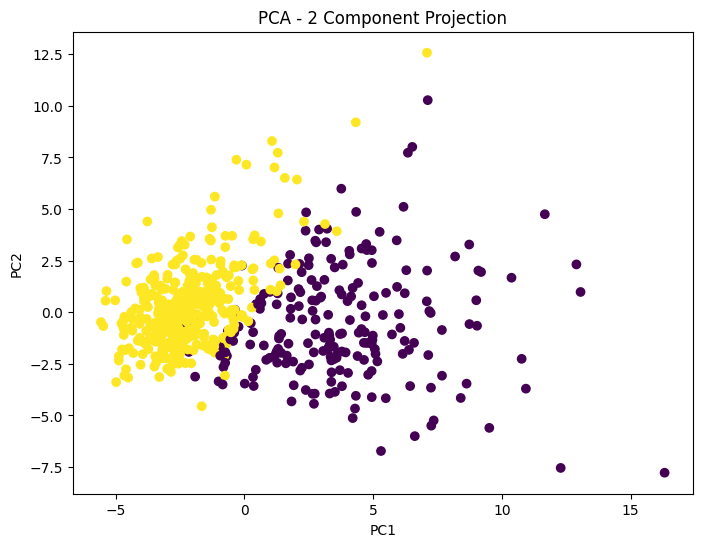

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - 2 Component Projection")
plt.show()


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

pipe = Pipeline([
    ("pca", PCA(n_components=10)),
    ("clf", LogisticRegression(max_iter=2000))
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

print("Accuracy after PCA:", accuracy_score(y_test, pred))


Accuracy after PCA: 0.9824561403508771
